MSE (fuel_efficiency): 10.084459835439105
MSE (engine_rpm): 3168051.5599183333


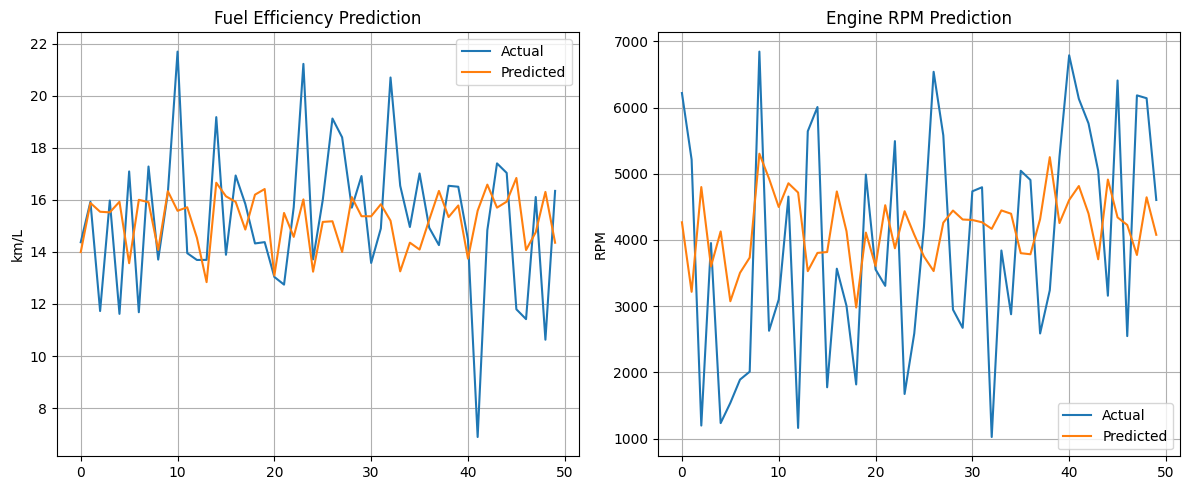

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simulate car sensor data
np.random.seed(42)
n = 300

df = pd.DataFrame({
    'throttle_position': np.random.uniform(0, 100, size=n),
    'intake_air_temp': np.random.normal(25, 3, size=n),
    'coolant_temp': np.random.normal(90, 5, size=n),
    'ambient_temp': np.random.normal(20, 4, size=n),
    'engine_load': np.random.uniform(20, 100, size=n),
    'fuel_flow_rate': np.random.normal(5, 1.5, size=n),
    # Targets
    'fuel_efficiency': np.random.normal(15, 3, size=n),  # km/L
    'engine_rpm': np.random.randint(1000, 7000, size=n)
})

# Features (X) and targets (y)
X = df[['throttle_position', 'intake_air_temp', 'coolant_temp', 'ambient_temp', 'engine_load', 'fuel_flow_rate']]
y = df[['fuel_efficiency', 'engine_rpm']]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multi-output model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MSE (fuel_efficiency):", mean_squared_error(y_test['fuel_efficiency'], y_pred[:, 0]))
print("MSE (engine_rpm):", mean_squared_error(y_test['engine_rpm'], y_pred[:, 1]))

# Plot sample predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(y_test['fuel_efficiency'].values[:50], label='Actual')
plt.plot(y_pred[:50, 0], label='Predicted')
plt.title("Fuel Efficiency Prediction")
plt.ylabel("km/L")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(y_test['engine_rpm'].values[:50], label='Actual')
plt.plot(y_pred[:50, 1], label='Predicted')
plt.title("Engine RPM Prediction")
plt.ylabel("RPM")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
